In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

SEED = 0

In [4]:
#Loading data
data = pd.read_csv("creditcard.csv", header=0)
#data.head()

In [5]:
#Handle Duplicated values
print("Duplicates", data.duplicated().sum())
data = data.drop_duplicates()
print("Rows {}, Columns {}".format(data.shape[0], data.shape[1]))

Duplicates 1081
Rows 283726, Columns 31


In [6]:
x_data = data.drop(columns=["Class"])
y_data = data["Class"]
X_train, X_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.3, random_state=SEED )

In [7]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)  # Compute class ratio
xgb_clf = XGBClassifier(scale_pos_weight=ratio, random_state=SEED)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[84977    12]
 [   26   103]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.90      0.80      0.84       129

    accuracy                           1.00     85118
   macro avg       0.95      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



Confusion matrix:
[[84977    12]
 [   26   103]]


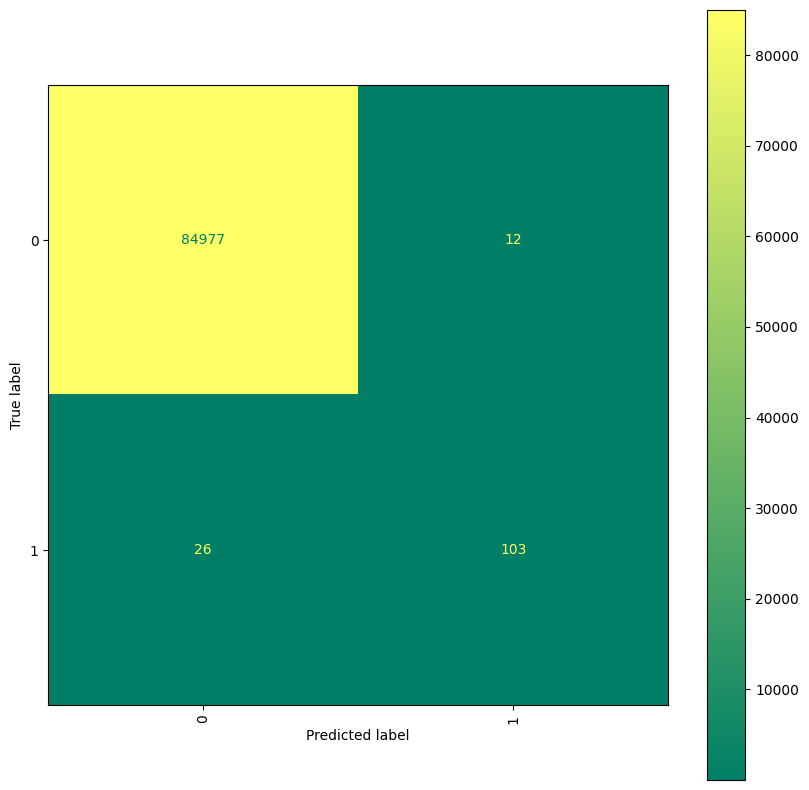

In [8]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=[0,1])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.show()